In [4]:
import numpy as np
import pandas as pd
import datetime
import sys

from matplotlib import pyplot as plt
from pandas_datareader import data
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [5]:
#Creating companies dict
dict_company={
    'Amazon':'AMZN',
    'APPLE':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockhead Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navister':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mitsubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'
}
    
    
companies=sorted(dict_company.items(),key=lambda x:x[1])

In [6]:
companies

[('APPLE', 'AAPL'),
 ('Amazon', 'AMZN'),
 ('American Express', 'AXP'),
 ('Boeing', 'BA'),
 ('Bank of America', 'BAC'),
 ('Chevron', 'CVX'),
 ('Ford', 'F'),
 ('General Electrics', 'GE'),
 ('Honda', 'HMC'),
 ('IBM', 'IBM'),
 ('Intel', 'INTC'),
 ('Johnson & Johnson', 'JNJ'),
 ('Coca Cola', 'KO'),
 ('Lockhead Martin', 'LMT'),
 ('McDonalds', 'MCD'),
 ('Mitsubishi', 'MSBHY'),
 ('MasterCard', 'MSFT'),
 ('Navister', 'NAV'),
 ('Northrop Grumman', 'NOC'),
 ('Pepsi', 'PEP'),
 ('Sony', 'SNE'),
 ('Symantec', 'SYMC'),
 ('Toyota', 'TM'),
 ('Texas Instruments', 'TXN'),
 ('Valero Energy', 'VLO'),
 ('Walgreen', 'WBA'),
 ('Exxon', 'XOM')]

In [8]:
#Fetching company stock values from Yahoo Finances in a given timeframe!
src_data='yahoo'

starting_date='2018-01-01'
ending_date='2020-01-01'

arr_comp=dict_company.values()
token_companies=[]
for i in arr_comp:
    token_companies.append(i)
stock_data=data.DataReader(token_companies,src_data,starting_date,ending_date)    

/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'SYMC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [9]:
token_companies

['AMZN',
 'AAPL',
 'WBA',
 'NOC',
 'BA',
 'LMT',
 'MCD',
 'INTC',
 'NAV',
 'IBM',
 'TXN',
 'MSFT',
 'GE',
 'SYMC',
 'AXP',
 'PEP',
 'KO',
 'JNJ',
 'TM',
 'HMC',
 'MSBHY',
 'SNE',
 'XOM',
 'CVX',
 'VLO',
 'F',
 'BAC']

In [10]:
#Print the Axes labels of stock data
print(stock_data.axes)

[DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',    'TM'),
            (   'Volume',   'HMC'),
            (   'Volume', 'MSBHY'),
            (   'Volume',   'SNE'),
            ( 

In [11]:
print(stock_data)

Attributes    Adj Close                         ...      Volume                 
Symbols            AMZN        AAPL        WBA  ...           F         BAC SYMC
Date                                            ...                             
2018-01-02  1189.010010  166.054321  69.553452  ...  20773300.0  57121600.0  NaN
2018-01-03  1204.199951  166.025375  70.073128  ...  29765600.0  57865700.0  NaN
2018-01-04  1209.589966  166.796555  66.444649  ...  37478200.0  76512500.0  NaN
2018-01-05  1229.140015  168.695572  67.669617  ...  46121900.0  56445200.0  NaN
2018-01-08  1246.869995  168.069016  68.532646  ...  33828300.0  42914800.0  NaN
...                 ...         ...        ...  ...         ...         ...  ...
2019-12-24  1789.209961  282.322266  57.195957  ...  11881600.0  13805400.0  NaN
2019-12-26  1868.770020  287.923645  57.735085  ...  28961300.0  26992100.0  NaN
2019-12-27  1869.800049  287.814392  57.852707  ...  28272800.0  28111300.0  NaN
2019-12-30  1846.890015  289

In [12]:
#Storing stock opening and closing data

stock_close=stock_data['Close']
stock_open=stock_data['Open']

In [13]:
stock_close.shape

(503, 27)

In [14]:
#Fetching the closing and opening stock values of all companies on all the days

stock_close=np.array(stock_close).T
stock_open=np.array(stock_open).T

In [15]:
row,col=stock_close.shape

In [16]:
print(row)
print(col)



27
503


In [17]:
#Defining a matrix to store the change in stock values of each company on each day

changeInStocks=np.zeros([row,col])

for i in range(0,row):
    changeInStocks[i,:]=np.subtract(stock_close[i,:], stock_open[i,:])

#Cleaning the data to replace NaN with 0    
    
changeInStocks=np.nan_to_num(changeInStocks)    

In [18]:
# Printing the net change in stock values over all the days for all the companies
for i in range(0,len(companies)):
    print ('Company: {},  Change: {}'.format(companies[i][0],sum(changeInStocks[i])))

Company: APPLE,  Change: -477.3397216796875
Company: Amazon,  Change: 82.93014526367188
Company: American Express,  Change: -16.799938201904297
Company: Boeing,  Change: -48.53021240234375
Company: Bank of America,  Change: 34.69976806640625
Company: Chevron,  Change: -64.12973022460938
Company: Ford,  Change: -33.480010986328125
Company: General Electrics,  Change: 10.289974212646484
Company: Honda,  Change: -24.82999038696289
Company: IBM,  Change: -27.209800720214844
Company: Intel,  Change: 12.929954528808594
Company: Johnson & Johnson,  Change: -11.350082397460938
Company: Coca Cola,  Change: -7.6819167137146
Company: Lockhead Martin,  Change: -4.839958190917969
Company: McDonalds,  Change: -12.319892883300781
Company: Mitsubishi,  Change: 0.7199974060058594
Company: MasterCard,  Change: -17.090065002441406
Company: Navister,  Change: -18.069915771484375
Company: Northrop Grumman,  Change: -8.190011978149414
Company: Pepsi,  Change: -8.836009979248047
Company: Sony,  Change: -4.13

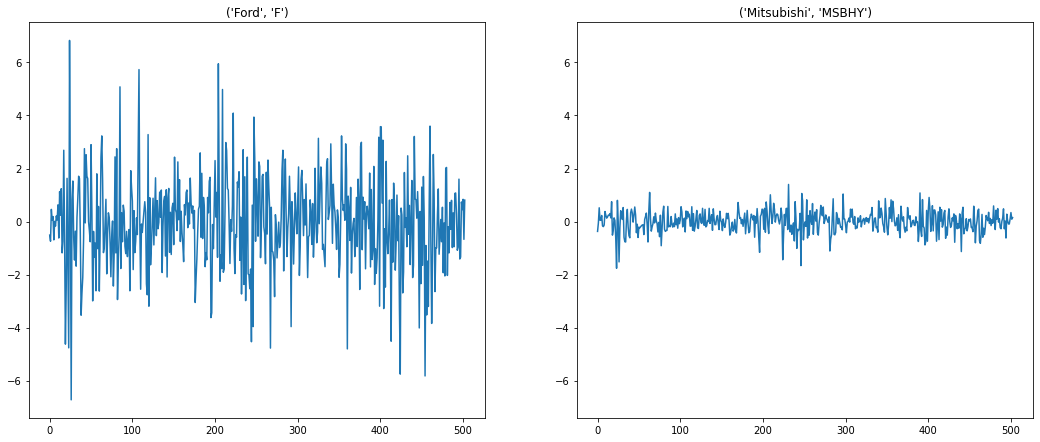

In [27]:
#Comparing the change in stock values of two companies Ford and Mitsubishi

plt.clf
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(changeInStocks[6][:])
plt.title(companies[6])

plt.subplot(222,sharey=ax1)
plt.plot(changeInStocks[15][:])
plt.title(companies[15])
plt.show()

In [28]:
#Bringing the data to same scale by normalizing


normalizer_func=Normalizer()
normalizedChangeInStocks=normalizer_func.fit_transform(changeInStocks)

print(normalizedChangeInStocks.max())
print(normalizedChangeInStocks.min())
print(normalizedChangeInStocks.mean())
print(normalizedChangeInStocks.std())

0.2983574950738525
-0.36477408225905567
-0.0010624784021218082
0.04374140406788335


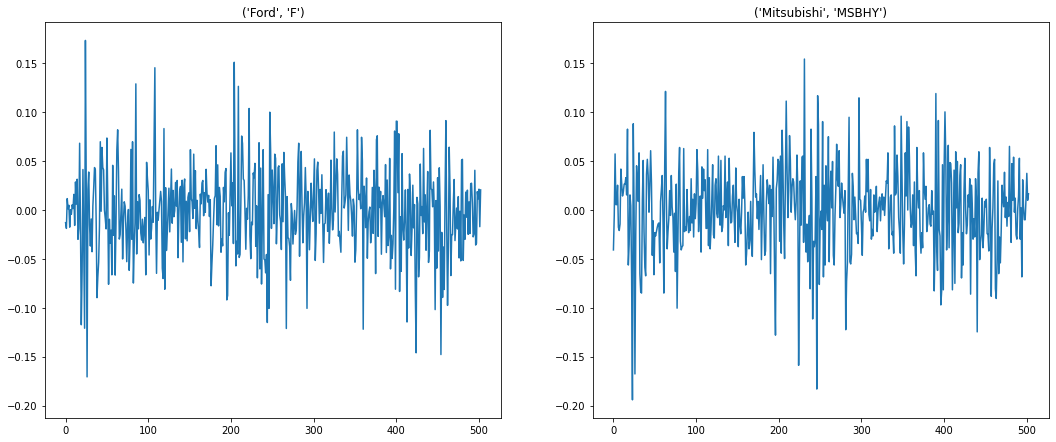

In [29]:
#Comparing the change in stock values of two companies Apple and Amazon to see the effect of data normalizing

plt.clf
plt.figure(figsize=(18,16))
ax1=plt.subplot(221)
plt.plot(normalizedChangeInStocks[6][:])
plt.title(companies[6])

plt.subplot(222,sharey=ax1)
plt.plot(normalizedChangeInStocks[15][:])
plt.title(companies[15])
plt.show()

In [30]:
normalizer_func=Normalizer()


kmeans=KMeans(n_clusters=8, max_iter=1000)

#Creating a pipeline to normalize data and apply KMeans
kmeans_pipeline=make_pipeline(normalizer_func,kmeans)

#Using KMeans on our stock values
kmeans_pipeline.fit(changeInStocks)


Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
#Clusters are predicted
labels=kmeans_pipeline.predict(changeInStocks)

#Assign labels and companies using dataframe
dataframe=pd.DataFrame({'labels':labels,'companies':companies})


print(dataframe.sort_values('labels'))

    labels                 companies
26       0              (Exxon, XOM)
6        0                 (Ford, F)
15       0       (Mitsubishi, MSBHY)
14       0          (McDonalds, MCD)
24       1      (Valero Energy, VLO)
2        1   (American Express, AXP)
20       1               (Sony, SNE)
19       1              (Pepsi, PEP)
9        1                (IBM, IBM)
18       1   (Northrop Grumman, NOC)
17       1           (Navister, NAV)
25       1           (Walgreen, WBA)
3        2              (Boeing, BA)
4        2    (Bank of America, BAC)
5        2            (Chevron, CVX)
0        3             (APPLE, AAPL)
11       3  (Johnson & Johnson, JNJ)
10       3             (Intel, INTC)
7        3   (General Electrics, GE)
1        3            (Amazon, AMZN)
13       3    (Lockhead Martin, LMT)
12       4           (Coca Cola, KO)
21       5          (Symantec, SYMC)
22       5              (Toyota, TM)
23       5  (Texas Instruments, TXN)
16       6        (MasterCard, MSFT)
8

    labels                 companies
15       0       (Mitsubishi, MSBHY)
14       0          (McDonalds, MCD)
18       1   (Northrop Grumman, NOC)
17       1           (Navister, NAV)
8        1              (Honda, HMC)
9        1                (IBM, IBM)
25       1           (Walgreen, WBA)
23       1  (Texas Instruments, TXN)
4        2    (Bank of America, BAC)
11       2  (Johnson & Johnson, JNJ)
12       3           (Coca Cola, KO)
22       3              (Toyota, TM)
21       3          (Symantec, SYMC)
24       3      (Valero Energy, VLO)
2        3   (American Express, AXP)
5        4            (Chevron, CVX)
3        4              (Boeing, BA)
7        5   (General Electrics, GE)
20       5               (Sony, SNE)
1        5            (Amazon, AMZN)
10       5             (Intel, INTC)
6        6                 (Ford, F)
16       6        (MasterCard, MSFT)
19       7              (Pepsi, PEP)
26       7              (Exxon, XOM)
13       8    (Lockhead Martin, LMT)
0

<Figure size 432x288 with 0 Axes>

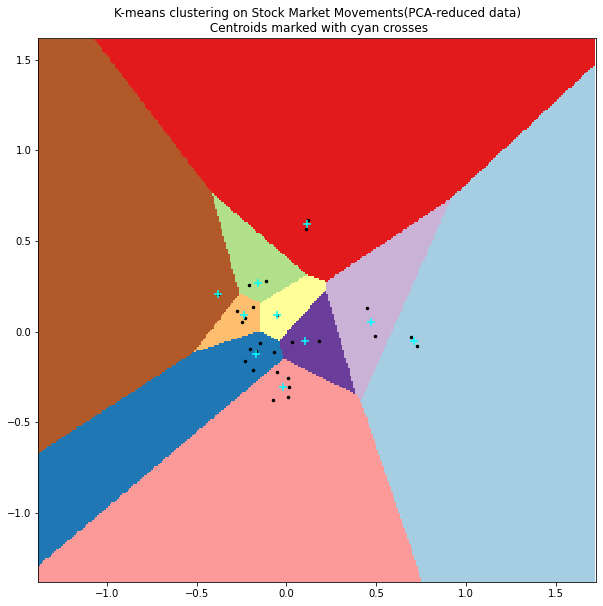

In [32]:
#Doing PCA 


#data is fitted using 2 components only
pca_reduced_data=PCA(n_components=2).fit_transform(normalizedChangeInStocks)

#Applying K-Means algo to the fitted data
kmeans=KMeans(n_clusters=10)
kmeans.fit(pca_reduced_data)

#Labels of the reduced data is predicted
labels=kmeans.predict(pca_reduced_data)

dataframe=pd.DataFrame({'labels':labels,'companies':companies})

print(dataframe.sort_values('labels'))
h=0.01

#Decision boundary plotted
x_min, x_max=pca_reduced_data[:,0].min()-1, pca_reduced_data[:,0].max()+1
y_min,y_max=pca_reduced_data[:,1].min()-1, pca_reduced_data[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


#Each point labels obtained
Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#Fitting the resulting labels in color plot
Z=Z.reshape(xx.shape)

#Color map defined
cmap=plt.cm.Paired

plt.clf()
plt.figure(figsize=(10,10))

plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect= 'auto', origin= 'lower')

plt.plot(pca_reduced_data[:, 0],pca_reduced_data[:,1],'k.',markersize=5)

#Plot the centroids as cyan '+' markers
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='+',s=50,linewidths=3,color='cyan',zorder=10)

plt.title('K-means clustering on reduced data Centroids marked with cyan crosses')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()